In [54]:
include("my_ode.jl")
using PyPlot

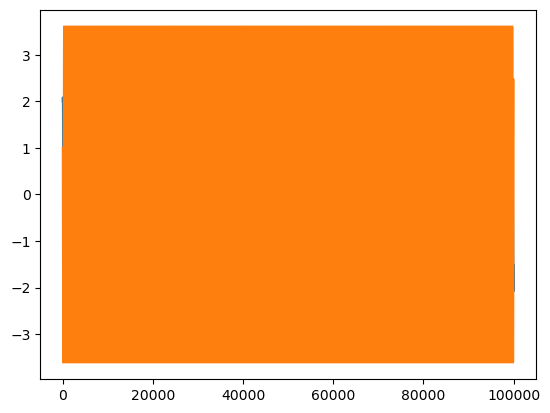

In [63]:
x0 = 2.0
v0 = 1.0
ω0 = sqrt(3.0)
tlim = (0.0, 1000.0)
Δt = 0.01
ϕ(x) = -ω0^2 * x

# --------------------------------------------True sol----------------------------------#
A = sqrt(((ω0*x0)^2+v0^2)/ω0^2)
δ = -atan(v0/(x0*ω0))
xsol(t) = A*cos(ω0*t + δ) #true solution
vsol(t) = -A*ω0* sin(ω0*t+δ); # derivative of xsol(t)
close("all")
plot([xsol(i) for i in tlim[1]:Δt:tlim[2]])
plot([vsol(i) for i in tlim[1]:Δt:tlim[2]])
gcf()

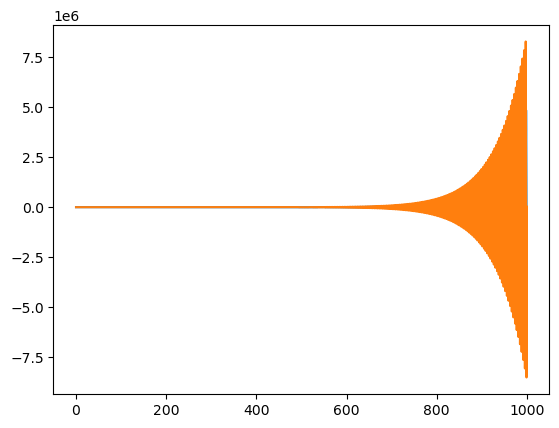

In [64]:
Euler_sol = solve(Euler(),ϕ,x0,v0,tlim,Δt=Δt)
Euler_cromer_sol = solve(Euler_cromer(),ϕ,x0,v0,tlim,Δt=Δt)
Midpoint_sol = solve(Midpoint(),ϕ,x0,v0,tlim,Δt=Δt)
Leapfrog_sol = solve(Leapfrog(),ϕ,x0,v0,tlim,Δt=Δt)
close("all")
plot(Euler_sol.t,Euler_sol.x)
plot(Euler_sol.t,Euler_sol.v)
gcf()



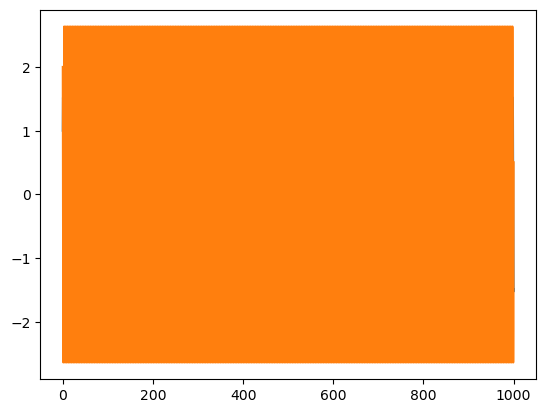

In [65]:
close("all")
plot(Euler_cromer_sol.t,Euler_cromer_sol.x)
plot(Euler_cromer_sol.t,Euler_cromer_sol.v)
gcf()

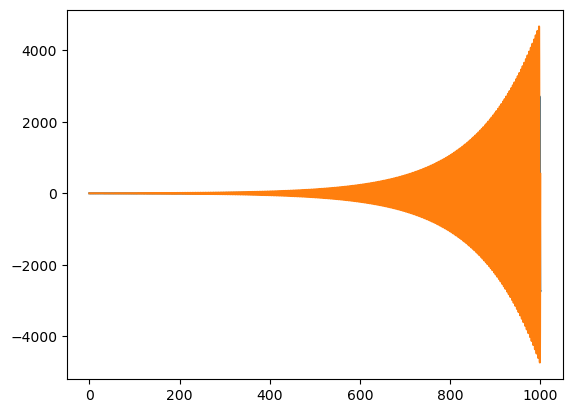

In [66]:
close("all")
plot(Midpoint_sol.t,Midpoint_sol.x)
plot(Midpoint_sol.t,Midpoint_sol.v)
gcf()

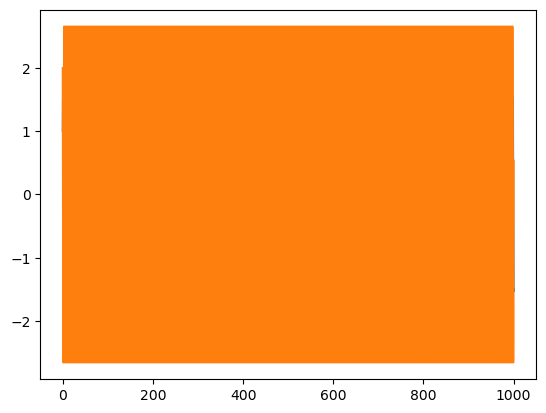

In [67]:

close("all")
plot(Leapfrog_sol.t,Leapfrog_sol.x)
plot(Leapfrog_sol.t,Leapfrog_sol.v)
gcf()

L2 norm

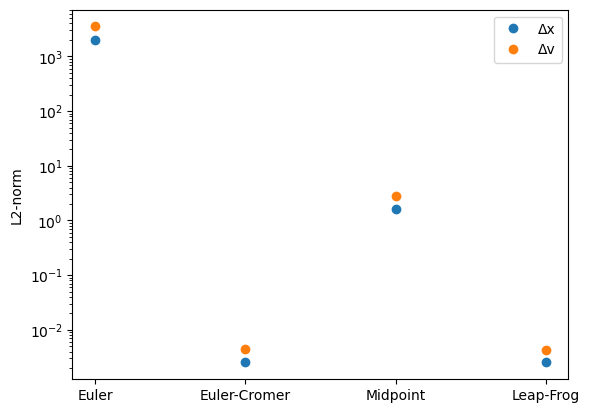

In [68]:

t = tlim[1]:Δt:tlim[2]
xtrue = xsol.(t)
vtrue = vsol.(t)
T = length(t)
Δx = [sqrt(sum(abs2, x.x - xtrue)) / T for x in (Euler_sol, Euler_cromer_sol, Midpoint_sol, Leapfrog_sol)]
Δv = [sqrt(sum(abs2, v.v - vtrue)) / T for v in (Euler_sol, Euler_cromer_sol, Midpoint_sol, Leapfrog_sol)];
close("all")
semilogy(Δx, "o")
semilogy(Δv, "o")
legend(["Δx", "Δv"])
ylabel("L2-norm")
xticks(0:3, ["Euler", "Euler-Cromer", "Midpoint","Leap-Frog"])
gcf()


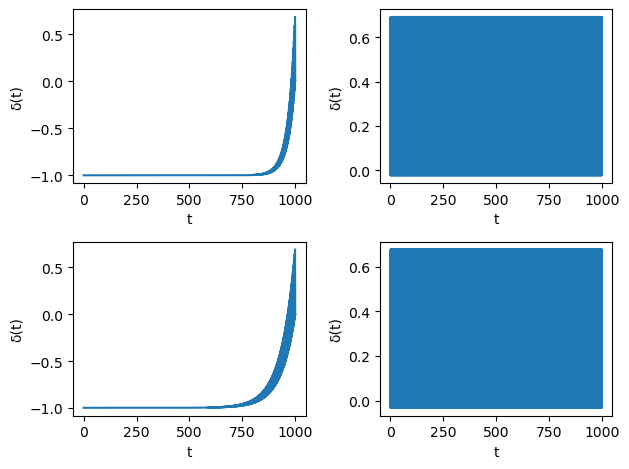

In [69]:

ene_euler = energy(Euler_sol.x,Euler_sol.v,ω0)
ene_eulercromer = energy(Euler_cromer_sol.x,Euler_cromer_sol.v,ω0)
ene_midpoint = energy(Midpoint_sol.x,Midpoint_sol.v,ω0)
ene_leapfrog = energy(Leapfrog_sol.x,Leapfrog_sol.v,ω0)
close("all");
fig, axs = subplots(2, 2)
axs[1, 1].plot(t, ene_euler)
axs[1, 2].plot(t, ene_eulercromer)
axs[2, 1].plot(t, ene_midpoint)
axs[2, 2].plot(t, ene_leapfrog)
for ax in axs
    ax.set(xlabel = "t", ylabel = "δ(t)")
end
fig.tight_layout() # to avoid overlappng ticks
gcf()

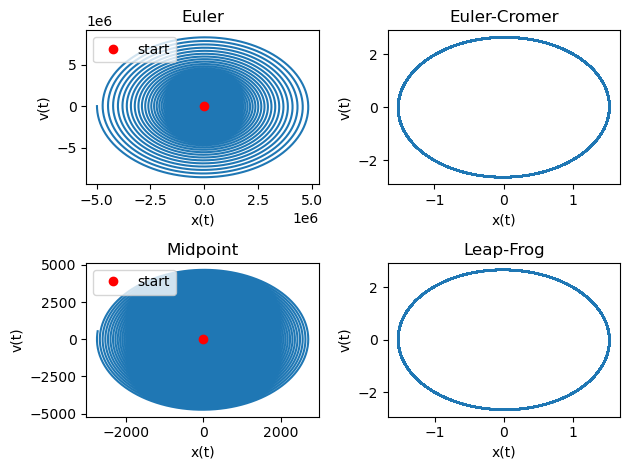

In [70]:
close("all");
fig, axs = subplots(2, 2)
axs[1, 1].plot(Euler_sol.x, Euler_sol.v, label = "_nolegend_")
axs[1, 1].plot(Euler_sol.x[1], Euler_sol.v[1], "ro")
axs[1, 1].legend(["start"])
axs[1, 1].set_title("Euler")
axs[1, 2].plot(Euler_cromer_sol.x, Euler_cromer_sol.v)
axs[1, 2].set_title("Euler-Cromer")
axs[2, 1].plot(Midpoint_sol.x, Midpoint_sol.v, label = "_nolegend_")
axs[2, 1].plot(Midpoint_sol.x[1], Midpoint_sol.v[1], "ro")
axs[2, 1].legend(["start"])
axs[2, 1].set_title("Midpoint")
axs[2, 2].plot(Leapfrog_sol.x, Leapfrog_sol.v)
axs[2, 2].set_title("Leap-Frog")
for ax in axs
    ax.set(xlabel = "x(t)", ylabel = "v(t)")
end
fig.tight_layout() # to avoid overlappng ticks
gcf()

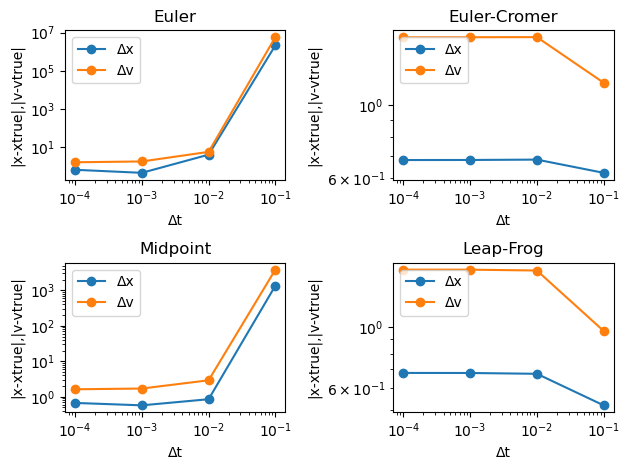

In [73]:
tlim = (0.0, 100.0);
vecΔ = [0.0001,0.001,0.01,0.1]

vec_sens_euler = Tuple{Float64,Float64}[]
vec_sens_eulercromer = Tuple{Float64,Float64}[]
vec_sens_midpoint = Tuple{Float64,Float64}[]
vec_sens_leapfrog = Tuple{Float64,Float64}[]
for d in vecΔ
    res_euler = solve(Euler(), ϕ, x0, v0, tlim, Δt = d, verbose = false)
    res_eulercromer = solve(Euler_cromer(), ϕ, x0, v0, tlim, Δt = d, verbose = false)
    res_midpoint = solve(Midpoint(), ϕ, x0, v0, tlim, Δt = d, verbose = false)
    res_leapfrog = solve(Leapfrog(), ϕ, x0, v0, tlim, Δt = d, verbose = false)
    sens_euler = (abs(res_euler.x[end] - xsol(tlim[2])), abs(res_euler.v[end] - vsol(tlim[2])))
    sens_eulercromer = (abs(res_eulercromer.x[end] - xsol(tlim[2])), abs(res_eulercromer.v[end] - vsol(tlim[2])))
    sens_midpoint = (abs(res_midpoint.x[end] - xsol(tlim[2])), abs(res_midpoint.v[end] - vsol(tlim[2])))
    sens_leapfrog = (abs(res_leapfrog.x[end] - xsol(tlim[2])), abs(res_leapfrog.v[end] - vsol(tlim[2])))
    push!(vec_sens_euler, sens_euler)
    push!(vec_sens_eulercromer, sens_eulercromer)
    push!(vec_sens_midpoint, sens_midpoint)
    push!(vec_sens_leapfrog, sens_leapfrog)
end
fig, axs = subplots(2, 2)
axs[1, 1].loglog(vecΔ, [map(x -> x[1], vec_sens_euler) map(x -> x[2], vec_sens_euler)], "-o")
axs[1, 1].legend(["Δx", "Δv"])
axs[1, 1].set_title("Euler")
axs[1, 2].loglog(vecΔ, [map(x -> x[1], vec_sens_eulercromer) map(x -> x[2], vec_sens_eulercromer)], "-o")
axs[1, 2].legend(["Δx", "Δv"])
axs[1, 2].set_title("Euler-Cromer")
axs[2, 1].loglog(vecΔ, [map(x -> x[1], vec_sens_midpoint) map(x -> x[2], vec_sens_midpoint)], "-o")
axs[2, 1].legend(["Δx", "Δv"])
axs[2, 1].set_title("Midpoint")
axs[2, 2].loglog(vecΔ, [map(x -> x[1], vec_sens_leapfrog) map(x -> x[2], vec_sens_leapfrog)], "-o")
axs[2, 2].legend(["Δx", "Δv"])
axs[2, 2].set_title("Leap-Frog")
for ax in axs
    ax.set(xlabel = "Δt", ylabel = "|x-xtrue|,|v-vtrue|")
end
fig.tight_layout()
gcf()